In [1]:
import pandas as pd
import os
import ut
from sklearn.linear_model import LogisticRegression


In [8]:

data_dir = "/scratch/users/neuroimage/conda/data/full_pca_data"
file_paths = os.listdir(data_dir)

# Create an empty dictionary to store the dataframes
pcas = {}

for file_path in file_paths:
    # Use the file name as the dictionary key
    name = file_path.split('.')[0]
    
    df = pd.read_csv(os.path.join(data_dir, file_path), header=None)
    
    pcas[name] = df.values.ravel() if name.lower().startswith('y') else df
    
    if name.lower().startswith('y'):
        pcas[name] = df.values.ravel()
    else:
        pcas[name] = df

In [9]:
pcas

{'X_test_cb':              0             1             2             3             4     
 0  -3.745977e+02  1.136328e+02 -3.388925e+01  2.072747e+01  2.538474e+02  \
 1  -1.048798e+02  3.209910e+02 -1.716159e+02  1.718763e+02  7.536541e+01   
 2   1.735257e+03 -1.178514e+03  4.036681e+02 -1.704323e+03 -1.627333e+03   
 3  -3.630465e+02  8.025272e+01  6.045839e+01  4.972351e+01  9.153025e+01   
 4  -1.693216e+01  2.586596e+01 -8.807395e+00 -7.223444e+01  1.581217e+01   
 ..           ...           ...           ...           ...           ...   
 82  4.929185e+08 -1.237073e+08 -1.467412e+08  5.416518e+08 -1.206271e+08   
 83  8.321923e+09 -6.917573e+08 -4.440051e+09  1.083218e+10  5.255693e+08   
 84 -1.735692e+02 -9.505158e+01  5.757883e+01  1.535559e+02  1.872418e+02   
 85 -4.401789e+02  9.622465e+01  2.413752e+01 -3.978641e+01  2.434826e+02   
 86 -9.198053e+01 -5.995979e+01  1.550053e+01  9.461436e+01  7.213785e+01   
 
              5             6             7             8    

In [5]:
logreg_wm_acc = ut.perform_logreg(pcas['X_train_wm'], pcas['y_train_wm'], pcas['X_test_wm'], pcas['y_test_wm'])
logreg_gm_acc = ut.perform_logreg(pcas['X_train_gm'], pcas['y_train_gm'], pcas['X_test_gm'], pcas['y_test_gm'])
logreg_cb_acc = ut.perform_logreg(pcas['X_train_cb'], pcas['y_train_cb'], pcas['X_test_cb'], pcas['y_test_cb'])

In [6]:
print(f"Classification accuracy under WM data: {logreg_wm_acc}")
print(f"Classification accuracy under GM data: {logreg_gm_acc}")
print(f"Classification accuracy under Combined data: {logreg_cb_acc}")

Classification accuracy under WM data: 0.8620689655172413
Classification accuracy under GM data: 0.7241379310344828
Classification accuracy under Combined data: 0.7126436781609196


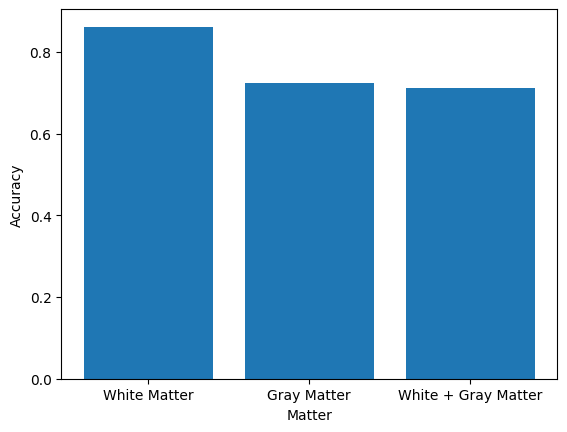

In [7]:
import matplotlib.pyplot as plt

# Create a bar plot
accuracies = [logreg_wm_acc, logreg_gm_acc, logreg_cb_acc]
labels = ['White Matter', 'Gray Matter', 'White + Gray Matter']
plt.bar(labels, accuracies)

# Add labels and title
plt.xlabel('Matter')
plt.ylabel('Accuracy')
# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()